In [1]:
from sklearn.tree import DecisionTreeClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego

#import dtreeviz.trees as dtv # importowanie dtreeviz

import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer


from sklearn.model_selection import cross_val_score,  StratifiedKFold

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_N.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df['scale'].value_counts()

NX    563
N0    359
N1     52
Name: scale, dtype: int64

In [4]:
train_df=train_df.loc[(train_df['scale']!='NX')]

In [5]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2,scale
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0,N0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0,N0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0,N0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0,N0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,34.548309,0.822579,18.096733,547.837468,9.870945,2.467736,805.304626,314.225094,536.321365,37832.865830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645158,0.000000,0.0,N1
407,5.160331,0.000000,2.948761,56.026453,1.474380,11.057853,16.955374,2.948761,43.494220,2322.886229,...,0.737190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N1
408,0.000000,0.000000,2.985051,7.960137,0.995017,3.980069,1.990034,0.995017,0.000000,35.820617,...,0.000000,0.000000,49.750857,0.000000,0.000000,0.000000,0.995017,0.000000,0.0,N1
409,13.307318,5.322927,29.276099,1189.674187,6.653659,0.000000,3.992195,0.000000,444.464405,9578.607153,...,1.330732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N1


In [6]:
y=train_df['scale']
del train_df['scale']

In [7]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

In [8]:
ftwo_scorer = make_scorer(fbeta_score, beta=1,labels=['N0','N1'],pos_label='N1',greater_is_better=True)


In [21]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'min_samples_split':range(2,6,1),
    'min_samples_leaf': range(1,6,1),    
    'max_leaf_nodes':range(2,6,1),
    'min_impurity_decrease':[0,0.1,0.2],
    'max_depth':list(range(2, 6,1))
}

In [24]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': range(2, 6),
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'splitter': ['best', 'random']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [25]:
grid_search_1.best_score_

0.3695165515598952

In [26]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

### Dobieranie part.2

In [27]:
param_grid = {
    'criterion':['gini'],
    'splitter':['random',],
    'min_samples_split':[2],
    'min_samples_leaf': range(2,15,1),    
    'max_leaf_nodes':range(2,15,1),
    'min_impurity_decrease':[0],
    'max_depth':[4]
}

In [28]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 169 candidates, totalling 845 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'max_leaf_nodes': range(2, 15),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': [2], 'splitter': ['random']},
             scoring=make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [29]:
grid_search_1.best_score_

0.3726800976800977

In [30]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [9]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    dt_2 =DecisionTreeClassifier(criterion='gini',
 max_depth=4,
 max_leaf_nodes=6,
 min_samples_leaf=3,
min_impurity_decrease= 0,
 min_samples_split= 2,
 splitter='random',random_state=42)
    

    dt_2.fit(zestaw_caly[train], caly_label[train])
    predykcje=dt_2.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['N0','N1'],pos_label='N1')
    wart_2.append(blad)
    licznik+=1

In [11]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_N_Drzewo_decyzyjne.csv')

In [2]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\N\\Klasa_N_Drzewo_decyzyjne.csv')

In [10]:
wart_2

[0.3076923076923077,
 0.4285714285714285,
 0.4444444444444445,
 0.30769230769230765,
 0.37499999999999994]

In [12]:
sum(wart_2)/5

0.3726800976800977

In [3]:
dane_do_zapisu_2

,Unnamed: 0,pred,obs,Fold
0,0,N0,N0,1
1,1,N0,N0,1
2,2,N0,N0,1
3,3,N0,N0,1
4,4,N0,N0,1
...,...,...,...,...
406,77,N0,N1,5
407,78,N0,N1,5
408,79,N0,N1,5
409,80,N1,N1,5


In [4]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [5]:
cf_matrix

array([[351,   8],
       [ 38,  14]], dtype=int64)

In [6]:
import seaborn as sns

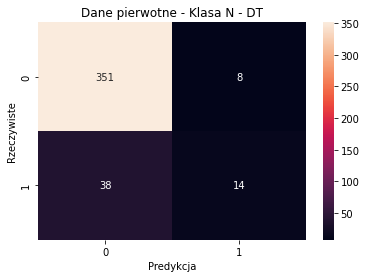

In [7]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa N - DT')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [18]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.269
Precision: 0.636
F1score: 0.378
